In [1]:
from scipy.stats  import stats
import scipy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#4
tsv =  'colon_cancer_tumor_vs_normal_paired_FPKM.tsv'
genes = pd.read_csv(tsv, sep='\t', index_col=0)
genes

,TCGA-A6-2671-01A,TCGA-A6-2675-01A,TCGA-A6-2678-01A,TCGA-A6-2679-01A,TCGA-A6-2680-01A,TCGA-A6-2671-11A,TCGA-A6-2675-11A,TCGA-A6-2678-11A,TCGA-A6-2679-11A,TCGA-A6-2680-11A
A1CF,0.104572,1.879323,2.263045,0.591325,1.748081,2.806357,1.943005,3.286552,2.621292,3.730646
A2M,5.245269,6.391484,5.349484,3.757025,5.531613,6.595546,7.227086,7.368415,6.973612,6.050510
A4GALT,1.950884,2.658956,1.106100,2.531637,2.134035,2.577567,3.497008,2.434910,2.275149,2.388146
AAAS,3.766274,3.391560,3.563471,4.029141,3.847224,3.119263,3.014724,3.237715,3.311642,2.905479
AACS,2.175574,1.867312,1.953893,2.751217,2.677885,2.120328,2.458516,1.999648,2.254447,1.841581
...,...,...,...,...,...,...,...,...,...,...
ZYX,7.079713,6.218721,5.461783,7.127480,7.115423,5.829922,6.972751,5.301008,5.680089,5.772487
ZZEF1,2.211049,2.551468,1.909931,2.294759,2.474978,4.242123,3.774900,4.046234,4.280730,4.595751
ZZZ3,1.740266,2.415543,2.813321,1.002186,1.913011,1.822592,2.269227,2.135920,1.777673,1.982387
chr22-38_28785274-29006793.1,0.036039,0.030454,0.040292,0.056988,0.035910,0.021111,0.025444,0.030724,0.026504,0.017014


In [68]:
#pd.options.mode.chained_assignment = None 

In [84]:
healthy = genes.loc[:, 'TCGA-A6-2671-11A':'TCGA-A6-2680-11A']
cancer = genes.loc[:, 'TCGA-A6-2671-01A':'TCGA-A6-2680-01A']
p = scipy.stats.ttest_rel(healthy, cancer, axis=1)
unp = scipy.stats.ttest_ind(healthy, cancer, axis=1)
pair = []
unpair = []
for i in range(16789):
    pair.append(p[0][i])
    unpair.append(unp[0][i])
healthy['Paired'] = pair
healthy = healthy.sort_values(by='Paired', ascending=False)
p_sign = healthy.iloc[:10]
healthy = healthy.drop(['Paired'], axis=1)
l1 = p_sign.index.tolist()

In [85]:
healthy['Unpaired'] = unpair
healthy = healthy.sort_values(by='Unpaired', ascending=False)
unp_sign = healthy.iloc[:10]
healthy = healthy.drop(['Unpaired'], axis=1)
l2 = unp_sign.index.tolist()

In [87]:
inter = set.intersection(set(l1), set(l2))
inter

set()

/Users/kseniakirdey/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(4.0, 14.0)

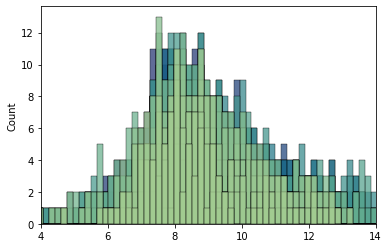

In [110]:
#5
tsv =  'breast_cancer_1000_genes.tsv'
b_genes = pd.read_csv(tsv, sep='\t', index_col=0)
b_genes
t = scipy.stats.shapiro(b_genes)
b_genes_gr = b_genes.iloc[:100]
b_genes_gr.index.name = 'genes'
sns.histplot(data=b_genes_gr, legend=False, palette="crest")
plt.xlim(4, 14)

In [111]:
t

ShapiroResult(statistic=0.9261412620544434, pvalue=0.0)

In [2]:
#1
#https://drive.google.com/file/d/1Ja_PQlbL5oo-pqCBjsAdb1K6BfJga5mG/view?usp=sharing

In [22]:
#2
df = pd.DataFrame()
df['x'] = np.linspace(10, 30, 100)
df['y'] = df['x'].add(1)
p = scipy.stats.ttest_rel(df['x'], df['y'])
unp = scipy.stats.ttest_ind(df['x'], df['y'])
print (p)
print (unp)

Ttest_relResult(statistic=-5.601281313739622e+16, pvalue=0.0)
Ttest_indResult(statistic=-1.2064800285980413, pvalue=0.22907199095857184)


In [90]:
#3
df = pd.DataFrame()
df['x'] = np.linspace(1000, 1001, 3)
df['y'] = np.linspace(-5000, 0, 3)
p = scipy.stats.ttest_rel(df['x'], df['y'])
unp = scipy.stats.ttest_ind(df['x'], df['y'])
print (p)
print (unp)

Ttest_relResult(statistic=2.425702681294201, pvalue=0.13610027088216844)
Ttest_indResult(statistic=2.425217492253593, pvalue=0.07235380373526501)
